In [1]:
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_salary = pd.read_csv("Salary_Data.csv")
df_salary

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [3]:
df_salary.info()
df_salary.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [4]:
df_salary.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [5]:
df = df_salary.dropna()
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

<Axes: xlabel='Salary', ylabel='Count'>

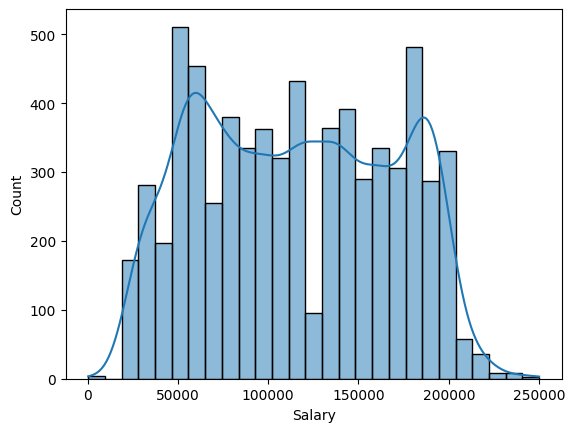

In [6]:
sns.histplot(df['Salary'], kde=True)

<Axes: xlabel='Age', ylabel='Salary'>

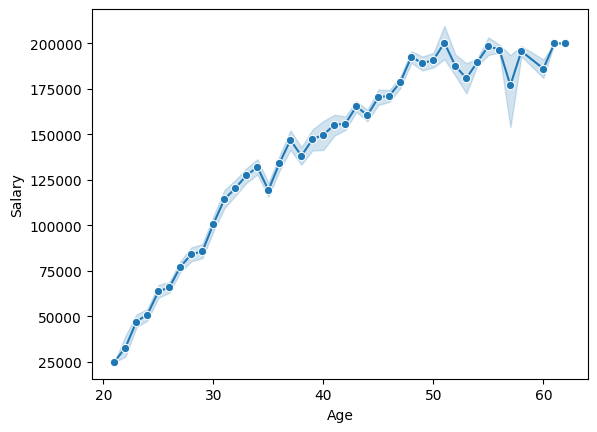

In [7]:
sns.lineplot(x='Age', y='Salary', data=df, marker='o')

C:\Users\USER\AppData\Local\Temp\ipykernel_20196\598104180.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Education Level'] = df['Education Level'].replace(
C:\Users\USER\AppData\Local\Temp\ipykernel_20196\598104180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education Level'] = df['Education Level'].replace(


array([1, 2, 3, 0])

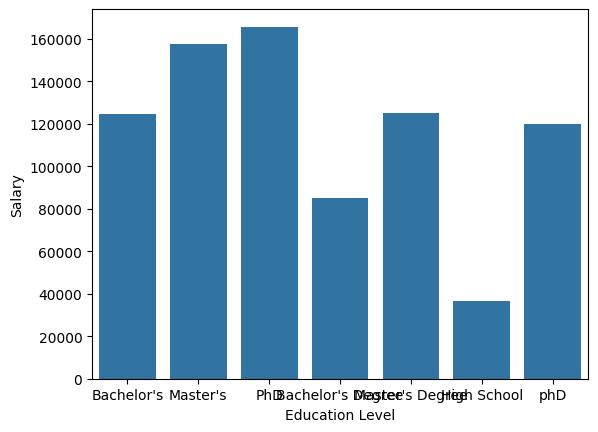

In [8]:
sns.barplot(x='Education Level', y='Salary', data=df, errorbar=None)
df['Education Level'].unique()
df['Education Level'] = df['Education Level'].replace(
    {"High School": 0, "Bachelor's": 1, "Bachelor's Degree" : 1, "Master's": 2, "Master's Degree": 2, 'PhD': 3, "phD": 3}
)
df['Education Level'].unique()

In [14]:
df_encode = pd.get_dummies(df, columns=["Gender", "Job Title"], drop_first=True)
df_encode.sum()

Age                              225207.0
Education Level                   10848.0
Years of Experience               54221.5
Salary                        772475337.0
Gender_Male                        3671.0
                                 ...     
Job Title_UX Designer                 1.0
Job Title_UX Researcher               1.0
Job Title_VP of Finance               1.0
Job Title_VP of Operations            1.0
Job Title_Web Developer              87.0
Length: 196, dtype: float64

In [15]:
y = df_encode["Salary"]
X = df_encode.drop(columns=["Salary"], axis=1)
y, X

(0        90000.0
 1        65000.0
 2       150000.0
 3        60000.0
 4       200000.0
           ...   
 6699    200000.0
 6700     50000.0
 6701     55000.0
 6702    140000.0
 6703     35000.0
 Name: Salary, Length: 6698, dtype: float64,
        Age  Education Level  Years of Experience  Gender_Male  Gender_Other  \
 0     32.0                1                  5.0         True         False   
 1     28.0                2                  3.0        False         False   
 2     45.0                3                 15.0         True         False   
 3     36.0                1                  7.0        False         False   
 4     52.0                2                 20.0         True         False   
 ...    ...              ...                  ...          ...           ...   
 6699  49.0                3                 20.0        False         False   
 6700  32.0                0                  3.0         True         False   
 6701  30.0                1         

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

x_test, x_cross, y_test, y_cross = train_test_split(x_test, y_test, test_size=0.5)
print(x_cross.shape)
print(y_cross.shape)
print(x_test.shape)
print(y_test.shape)

(4018, 195)
(4018,)
(2680, 195)
(2680,)
(1340, 195)
(1340,)
(1340, 195)
(1340,)


In [18]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [21]:
print("Coefficients: ", reg.coef_)
print("Variance score: ", reg.score(x_cross, y_cross))

Coefficients:  [ 2.27668283e+02  4.83077419e+03  5.02162548e+03 -1.64938334e+02
 -3.56745022e+04 -5.60248736e-10 -4.65036158e+04  2.05222376e+04
 -4.51049092e+02 -7.13043846e-10  1.67347025e-10  7.04694613e+04
  4.22915036e-10  6.53742019e+04  1.35260369e+04 -1.91893888e+04
 -7.46702467e+03 -2.64957626e+04 -1.87967821e+04 -2.24150795e+04
 -1.90244504e+04 -1.37124267e+04  5.01271709e+04 -1.34631330e+04
  4.96171023e+04 -1.52397521e+04  6.44831744e-10  6.39824633e+03
 -4.54027724e+03  4.02914780e+04  1.64514449e+04  5.70088823e+04
  2.69067814e+04  1.14298194e+04  3.70645798e+03  1.57879190e+04
  5.45855728e+03  2.38204646e+04  9.74784604e+03  1.11805256e+04
  2.19067814e+04  5.70785104e+03 -2.52839527e-10  8.16726242e-10
  1.48185143e+04  3.46207781e+04  9.83225794e+03  1.34123017e+04
  2.73903185e+04 -9.24758196e+03 -1.37515599e-09 -1.81132125e+04
 -1.32981946e+04 -1.87341974e+04  2.10372128e+04  5.60772843e+03
 -2.84901127e+04 -9.47978700e+03  1.24350663e-09 -1.37967821e+04
 -1.914909

In [25]:
from sklearn.metrics import mean_squared_error

y_train_pred = reg.predict(x_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print("train cost: ", mse_train)

y_cross_pred = reg.predict(x_cross)
mse_cross = mean_squared_error(y_cross, y_cross_pred)
print("cross validation cost: ", mse_cross)

y_test_pred = reg.predict(x_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print("test cost: ", mse_test)



train cost:  445806727.67214626
cross validation cost:  465132183.49426734
test cost:  449804642.0680837


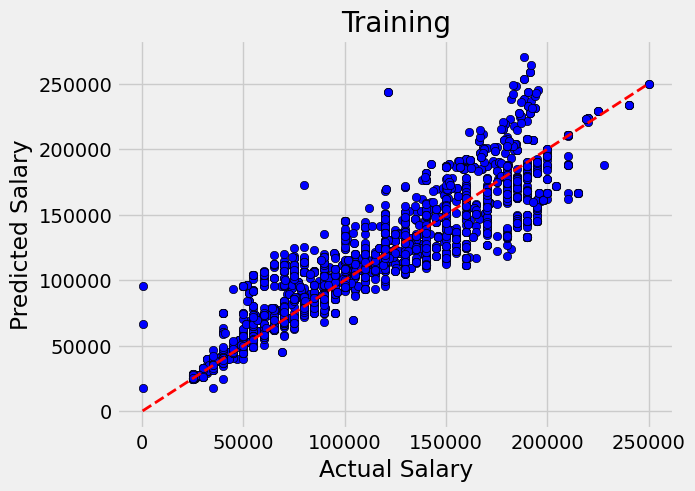

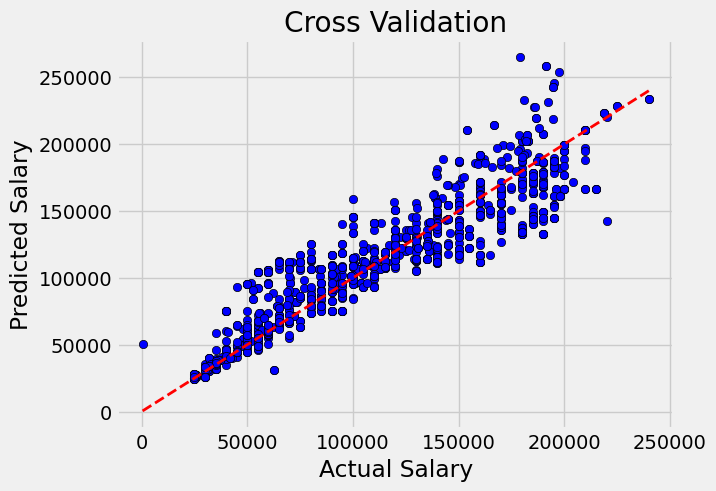

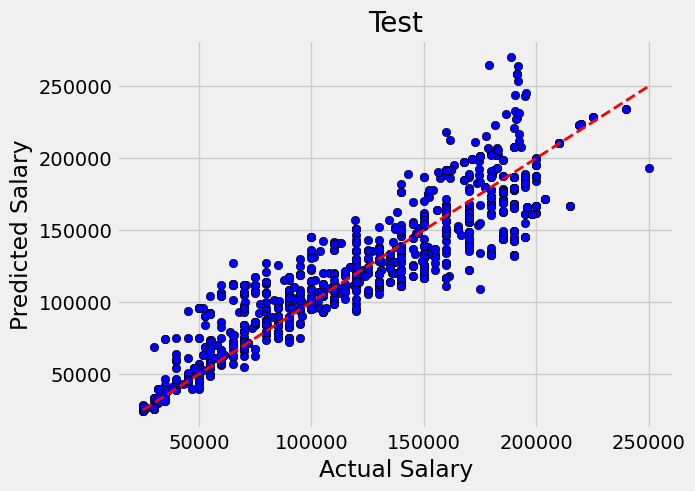

In [27]:
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.scatter(y_true, y_pred, color='blue', edgecolors='k')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel("Actual Salary")
    plt.ylabel("Predicted Salary")
    plt.title(title)
    plt.show()

plot_actual_vs_predicted(y_train, y_train_pred, "Training")
plot_actual_vs_predicted(y_cross, y_cross_pred, "Cross Validation")
plot_actual_vs_predicted(y_test, y_test_pred, "Test")


In [30]:
reg.get_params()
print("Intercept (bias):", reg.intercept_)
print("Coefficients (weights):", reg.coef_)

Intercept (bias): 37940.65169835329
Coefficients (weights): [ 2.27668283e+02  4.83077419e+03  5.02162548e+03 -1.64938334e+02
 -3.56745022e+04 -5.60248736e-10 -4.65036158e+04  2.05222376e+04
 -4.51049092e+02 -7.13043846e-10  1.67347025e-10  7.04694613e+04
  4.22915036e-10  6.53742019e+04  1.35260369e+04 -1.91893888e+04
 -7.46702467e+03 -2.64957626e+04 -1.87967821e+04 -2.24150795e+04
 -1.90244504e+04 -1.37124267e+04  5.01271709e+04 -1.34631330e+04
  4.96171023e+04 -1.52397521e+04  6.44831744e-10  6.39824633e+03
 -4.54027724e+03  4.02914780e+04  1.64514449e+04  5.70088823e+04
  2.69067814e+04  1.14298194e+04  3.70645798e+03  1.57879190e+04
  5.45855728e+03  2.38204646e+04  9.74784604e+03  1.11805256e+04
  2.19067814e+04  5.70785104e+03 -2.52839527e-10  8.16726242e-10
  1.48185143e+04  3.46207781e+04  9.83225794e+03  1.34123017e+04
  2.73903185e+04 -9.24758196e+03 -1.37515599e-09 -1.81132125e+04
 -1.32981946e+04 -1.87341974e+04  2.10372128e+04  5.60772843e+03
 -2.84901127e+04 -9.47978700e+